# 可视化

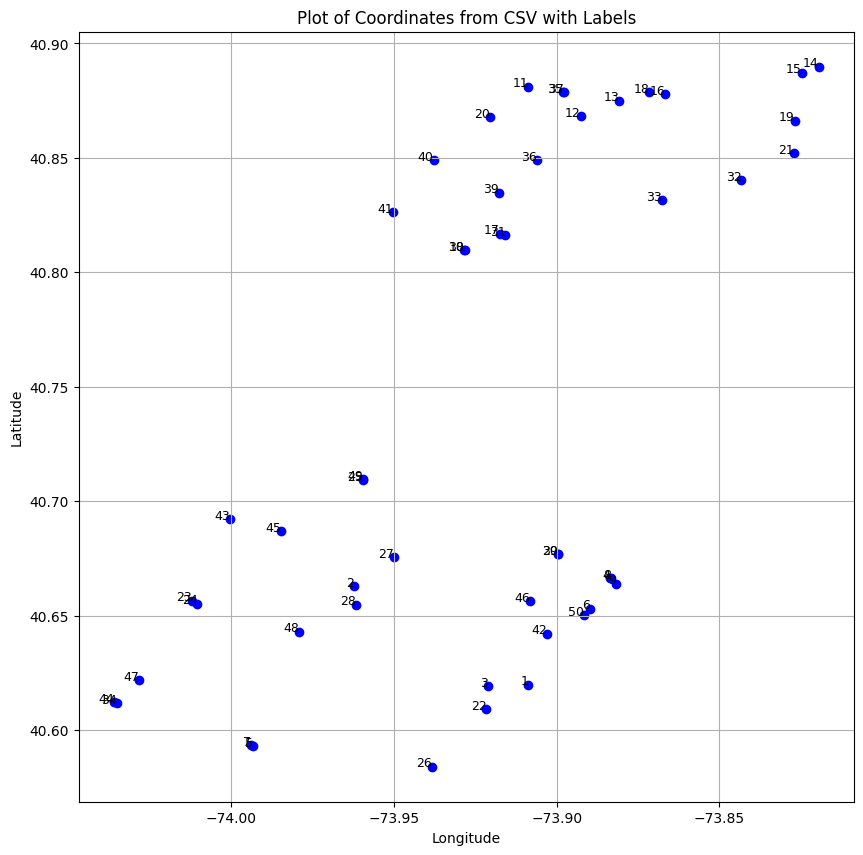

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取CSV文件
file_path = 'data/data_50.csv'
df = pd.read_csv(file_path, header=None, names=['latitude', 'longitude'])

# 分离经纬度数据
latitudes = df['latitude']
longitudes = df['longitude']

# 创建图形
plt.figure(figsize=(10, 10))
plt.scatter(longitudes, latitudes, c='blue', marker='o')

# 添加编号
for i, (lat, lon) in enumerate(zip(latitudes, longitudes), start=1):
    plt.text(lon, lat, str(i), fontsize=9, ha='right')

plt.title("Plot of Coordinates from CSV with Labels")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


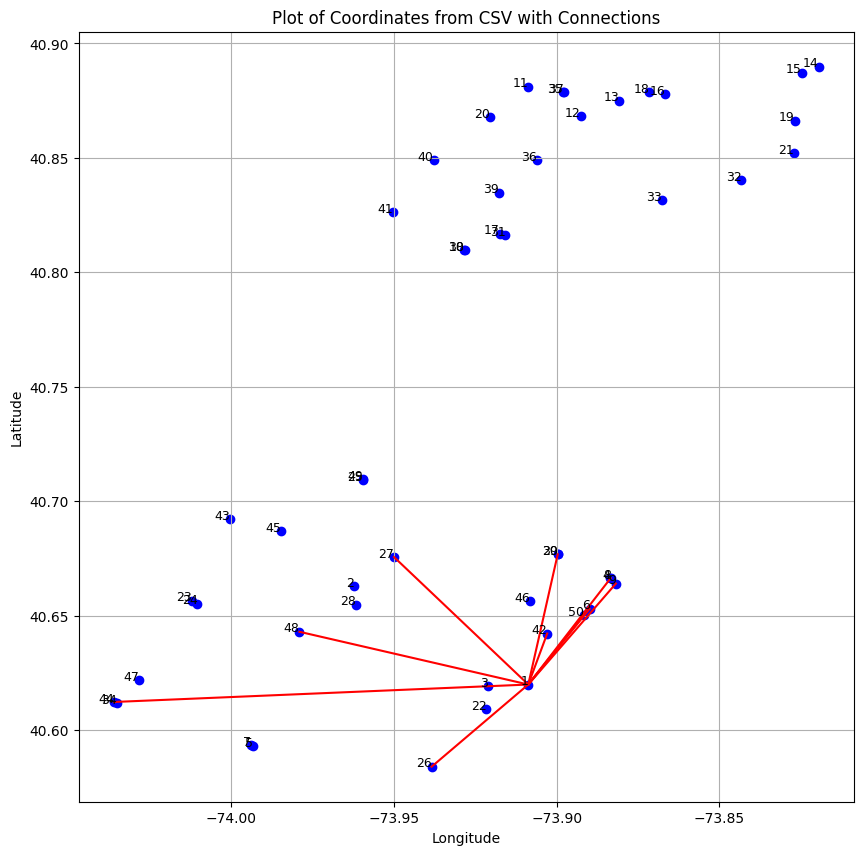

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 读取CSV文件
points_file_path = 'data/data_50.csv'
edges_file_path = 'data/roads_50.csv'

# 读取点数据
points_df = pd.read_csv(points_file_path, header=None, names=['latitude', 'longitude'])

# 读取连线矩阵
edges_df = pd.read_csv(edges_file_path, header=None)

# 分离经纬度数据
latitudes = points_df['latitude']
longitudes = points_df['longitude']

# 创建图形
plt.figure(figsize=(10, 10))
plt.scatter(longitudes, latitudes, c='blue', marker='o')

# 添加编号
for i, (lat, lon) in enumerate(zip(latitudes, longitudes), start=1):
    plt.text(lon, lat, str(i), fontsize=9, ha='right')

# 添加连线
#for i in range(len(points_df)):
for i in range(1):
    for j in range(i + 1, len(points_df)):
        if edges_df.iat[i, j] == 1:  # 如果有连线
            plt.plot([longitudes[i], longitudes[j]], [latitudes[i], latitudes[j]], 'r-')

plt.title("Plot of Coordinates from CSV with Connections")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [4]:
# 函数块 1
# 导入load_and_process_data函数
from data_lode import load_and_process_data

# 指定数据文件目录
data_directory = 'data'

# 调用函数获取处理后的数据
processed_data = load_and_process_data(data_directory)

# 访问各个DataFrame
data_50 = processed_data['data_50']
evs_50 = processed_data['evs_50']
distance_50 = processed_data['distance_50']
roads_50 = processed_data['roads_50']
speed_50 = processed_data['speed_50']



data_50.csv 内容：
          经度         纬度  编号
0  40.619935 -73.908708   0
1  40.663012 -73.962211   1
2  40.619318 -73.920946   2
3  40.666382 -73.883617   3
4  40.592947 -73.993383   4

ev_data.csv 处理后内容：
   初始电量  电池容量      截止时间  行驶能耗  起点编号  终点编号
0    34    97  1.791736    12    26    40
1    47   100  1.934729    14    28    10
2    40    88  1.757860    12    17    37
3    40    81  1.466165    13    47    10
4    41    95  1.698382    13     8    40


In [8]:
import pandas as pd

# 函数块 2
# 计算走每条路所需要的时间
def calculate_travel_time(distance_50, speed_50):
    distance_50 = pd.read_csv('data/distance_50.csv', header=None)
    speed_50 = pd.read_csv('data/speed_50.csv', header=None)
    """
    根据距离和速度计算每条路所需的时间。
    """
    # 计算时间 = 距离 / 速度
    time_50 = distance_50 / speed_50
    return time_50

# 调用函数并计算时间
time_50 = calculate_travel_time(distance_50, speed_50)

# 打印计算出的时间矩阵
print(time_50)


          0         1         2         3         4         5         6   \
0        NaN  0.134393  0.028828  0.154928  0.143847  0.093203  0.173153   
1   0.134393       NaN  0.166034  0.130519  0.146702  0.159470  0.194597   
2   0.028828  0.166034       NaN  0.122122  0.117140  0.084754  0.151432   
3   0.154928  0.130519  0.122122       NaN  0.209472  0.030829  0.325180   
4   0.143847  0.146702  0.117140  0.209472       NaN  0.314652  0.001477   
5   0.093203  0.159470  0.084754  0.030829  0.314652       NaN  0.186720   
6   0.173153  0.194597  0.151432  0.325180  0.001477  0.186720       NaN   
7   0.186291  0.136247  0.179994  0.000463  0.364008  0.052762  0.269007   
8   0.180085  0.136040  0.180934  0.008378  0.341900  0.038886  0.236698   
9   0.364287  0.435021  0.469810  0.314369  0.503715  0.465474  0.572854   
10  0.491490  0.439863  0.510261  0.683825  0.762439  0.563812  0.574302   
11  0.459983  0.500605  0.602990  0.477025  0.737831  0.497709  0.772695   
12  0.676551